<a href="https://colab.research.google.com/github/ibrahimHeritch/Neural-Networks/blob/master/function_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

Discription: This is my first Classification neural model. The idea is that I'll make a model that can classify a set of 2d-data as belonging to a specific type of function of 1 variable. For example, if the data is linear (in the form of y= ax+b) then the model should classify it as such. The 3 types of functions that I'll look at are:

1.   Linear ((a*x)+b)
2.   Quatratic (a*((X+b)**2)+d)
3.    ((e*(X+g)**3)+d)

The data will be created with a error of max/min  +-1 (this is to memic measurement error although I'm not sure why i chose +-1). The idea here is that if I measure a natural phenomenom this model would give me the nature of the equation that governs it. I'm not exactly sure how effective or useful this would be, but I think that working with mathematical data might give me a better intuition to how this works.





 

In [0]:
import random as rand

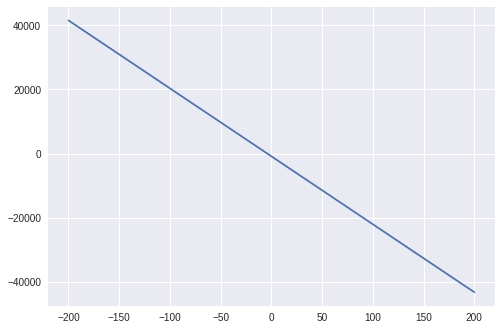

In [71]:
import matplotlib.pyplot as plot
def linear():
  a=rand.uniform(-1000,1000)
  b=rand.uniform(-1000,1000)

  return [((a*x)+b)+rand.uniform(-1,1) for x in range(-200,201)]
plot.plot(range(-200,201),linear())

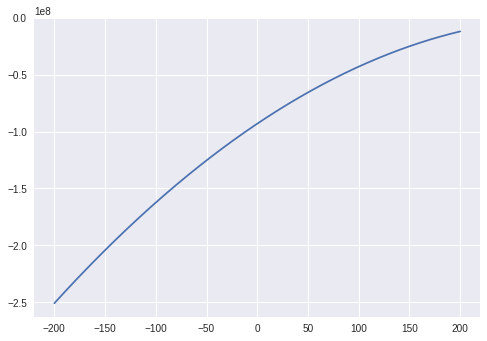

In [72]:
def quad():
  #a(X+b)^2+cX+d
  a=rand.uniform(-1000,1000)
  b=rand.uniform(-1000,1000)
  c=rand.uniform(-1000,1000)
  d=rand.uniform(-1000,1000)
  return [(a*((X+b)**2)+d)+rand.uniform(-1,1) for X in range(-200,201)]
plot.plot(range(-200,201),quad())

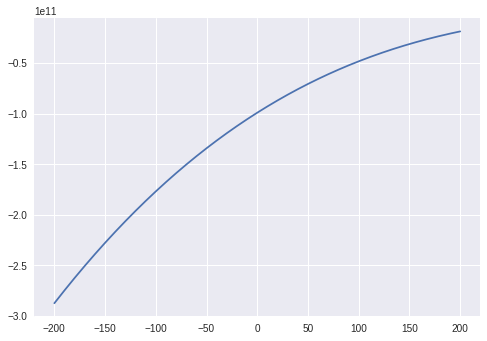

In [73]:
def cube():
  #e(X+g)^3+a(X+b)^2+cX+d 
  e=rand.uniform(-1000,1000)
  g=rand.uniform(-1000,1000)
  a=rand.uniform(-1000,1000)
  b=rand.uniform(-1000,1000)
  c=rand.uniform(-1000,1000)
  d=rand.uniform(-1000,1000)
  return [((e*(X+g)**3)+d)+rand.uniform(-1,1) for X in range(-200,201)]
plot.plot(range(-200,201),cube())

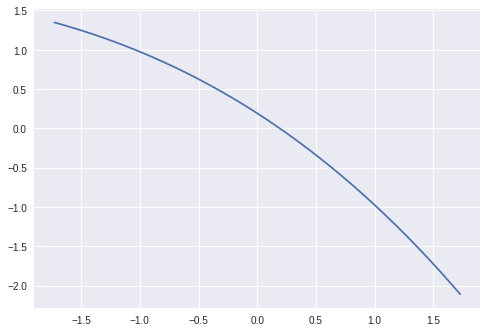

In [74]:
def normalize(x):
  m=np.mean(x)
  sd=np.std(x)
  return [(X-m)/sd for X in x]
plot.plot(normalize(range(-200,201)),normalize(cube()))

In [75]:
Data=[[normalize(linear()),0] for _ in range(0,1001)]+[[normalize(quad()),1] for _ in range(0,901)]+[[normalize(cube()),2] for _ in range(0,1101)]
print(Data[0])
rand.shuffle(Data)

[[-1.7277407263343072, -1.7190937716952195, -1.7104500167090662, -1.70182914301709, -1.6931804141481672, -1.6845494460576207, -1.675909149037588, -1.667274941764343, -1.6586356825196111, -1.6499882846947618, -1.641351980922014, -1.6327045970527574, -1.6240716919453642, -1.6154383995257773, -1.6068006345579278, -1.5981659917782216, -1.589518013244227, -1.5808724679976847, -1.57224706500983, -1.5636059170690073, -1.5549623717748384, -1.5463149747026457, -1.5376877033907264, -1.5290541982782369, -1.5204012063675902, -1.5117691376389777, -1.503120855961551, -1.4945000571991744, -1.48585265130937, -1.4772112053051114, -1.4685720962869153, -1.4599327943883322, -1.4513030763560553, -1.4426551789144995, -1.4340145152909913, -1.4253802731794365, -1.4167498855240335, -1.4080957880804406, -1.3994607983110086, -1.3908288674924492, -1.3821974986184384, -1.3735569430332235, -1.3649117388393566, -1.3562805215311746, -1.3476305418834278, -1.3390024291568623, -1.3303580062955802, -1.3217116486861642, -

In [76]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

x_train=np.array([D[0] for D in Data])
y_train=np.array(to_categorical([D[1] for D in Data]))
test=[[normalize(linear()),0] for _ in range(0,3401)]+[[normalize(quad()),1] for _ in range(0,4002)] +[[normalize(cube()),2] for _ in range(0,5009)]
rand.shuffle(test)
x_test=np.array([D[0] for D in test])
y_test=np.array(to_categorical([D[1] for D in test]))
print(y_train)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [0]:
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='elu', input_shape=(401,)))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(3, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [78]:
# build the model
model = classification_model()

# fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=150, verbose=2)

# evaluate the model
print(model.evaluate(x_test, y_test, verbose=0))

Train on 3003 samples, validate on 12412 samples
Epoch 1/150
 - 1s - loss: 0.8727 - acc: 0.5651 - val_loss: 0.5451 - val_acc: 0.7644
Epoch 2/150
 - 0s - loss: 0.4183 - acc: 0.8055 - val_loss: 0.4041 - val_acc: 0.7954
Epoch 3/150
 - 0s - loss: 0.3672 - acc: 0.8242 - val_loss: 0.3886 - val_acc: 0.8070
Epoch 4/150
 - 0s - loss: 0.3496 - acc: 0.8335 - val_loss: 0.3941 - val_acc: 0.7895
Epoch 5/150
 - 0s - loss: 0.3223 - acc: 0.8452 - val_loss: 0.3502 - val_acc: 0.8328
Epoch 6/150
 - 0s - loss: 0.3179 - acc: 0.8372 - val_loss: 0.3513 - val_acc: 0.8250
Epoch 7/150
 - 0s - loss: 0.3094 - acc: 0.8492 - val_loss: 0.3180 - val_acc: 0.8476
Epoch 8/150
 - 1s - loss: 0.2969 - acc: 0.8591 - val_loss: 0.3433 - val_acc: 0.8375
Epoch 9/150
 - 0s - loss: 0.2979 - acc: 0.8508 - val_loss: 0.2954 - val_acc: 0.8739
Epoch 10/150
 - 0s - loss: 0.2799 - acc: 0.8648 - val_loss: 0.4230 - val_acc: 0.7519
Epoch 11/150
 - 0s - loss: 0.2802 - acc: 0.8581 - val_loss: 0.3094 - val_acc: 0.8589
Epoch 12/150
 - 1s - loss

In [79]:
print(model.predict(np.array([[(x**3*1.1)+(x**2*1.1)+2.3*x for x in range(-200,201)]])))



[[0. 0. 1.]]


In [80]:
print(model.predict(np.array([[(x**3*0.0000001)+(x**2*0.00000001)+2000.3*x for x in range(-200,201)]])))

[[0. 1. 0.]]


In [81]:
print(model.predict(np.array([[(x**3*0.006)+(x**2*2000.0)+2.3*x for x in range(-200,201)]])))

[[0. 1. 0.]]


Coefficients play a role